# Induced Dipole EFT (SREFT with benefits)

## A Low-Energy Picture of the $\pi^+-H$ System

$$
    V(r) = \rho(r;R) \left( -\frac{C_4}{r^4} \right) + g_{\rm LO} e^{-(r/R)^4}
$$

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import interp1d
from scipy import optimize

import mu2
import constants as const
from interaction import potential
from counterterm import local_LO_counterterm
from mottmassey import mm_potential

gr = 4/3
h = 3

plt.style.use('science')

In [2]:
rg_flow_lo = np.loadtxt('rgflow_local_lo_a0_fix.txt')

## Leading Order

We keep $B_6$ fixed as we make $R$ smaller and smaller. What do you expect $g_{\rm LO}(R)$ to look like?

### RG Flow

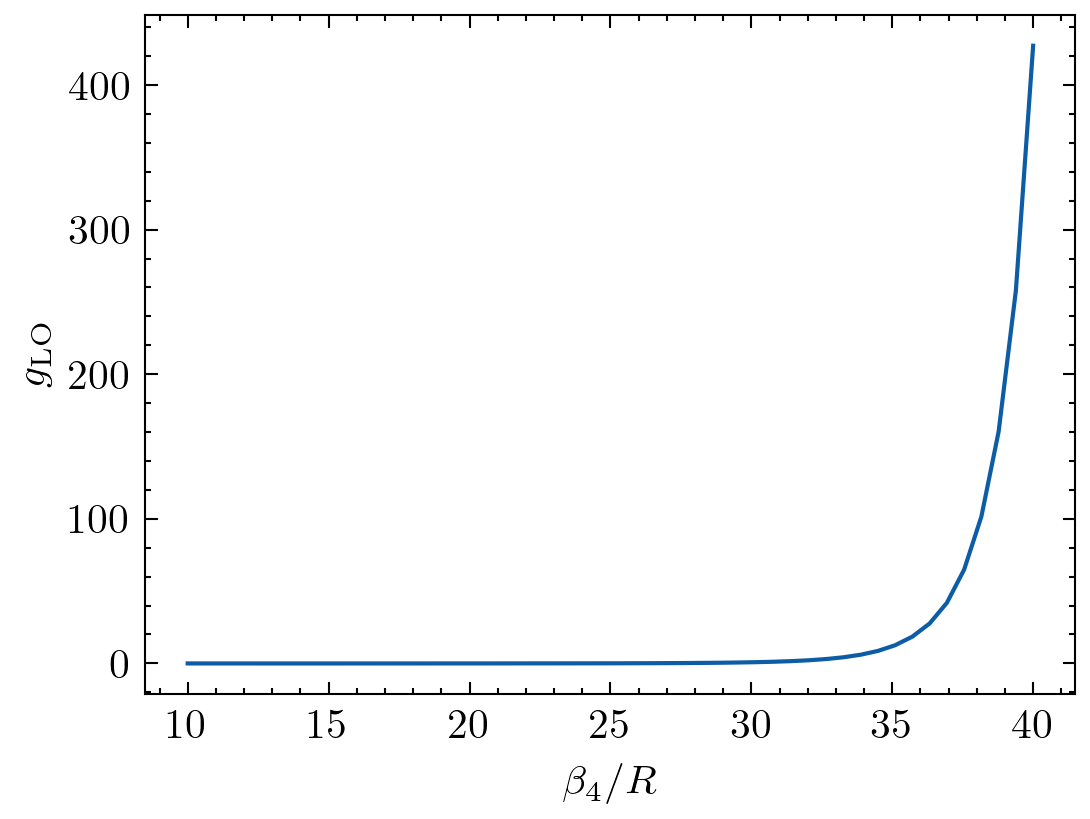

In [7]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

ax.plot(const.BETA4/rg_flow_lo[:, 0], rg_flow_lo[:, 1])

ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$g_{\rm LO}$');

In [4]:
mm_spectrum = np.loadtxt('spectra_Mott_Massey.txt')
lo_spectra = np.loadtxt('spectra_local_lo_a0_fix.txt')

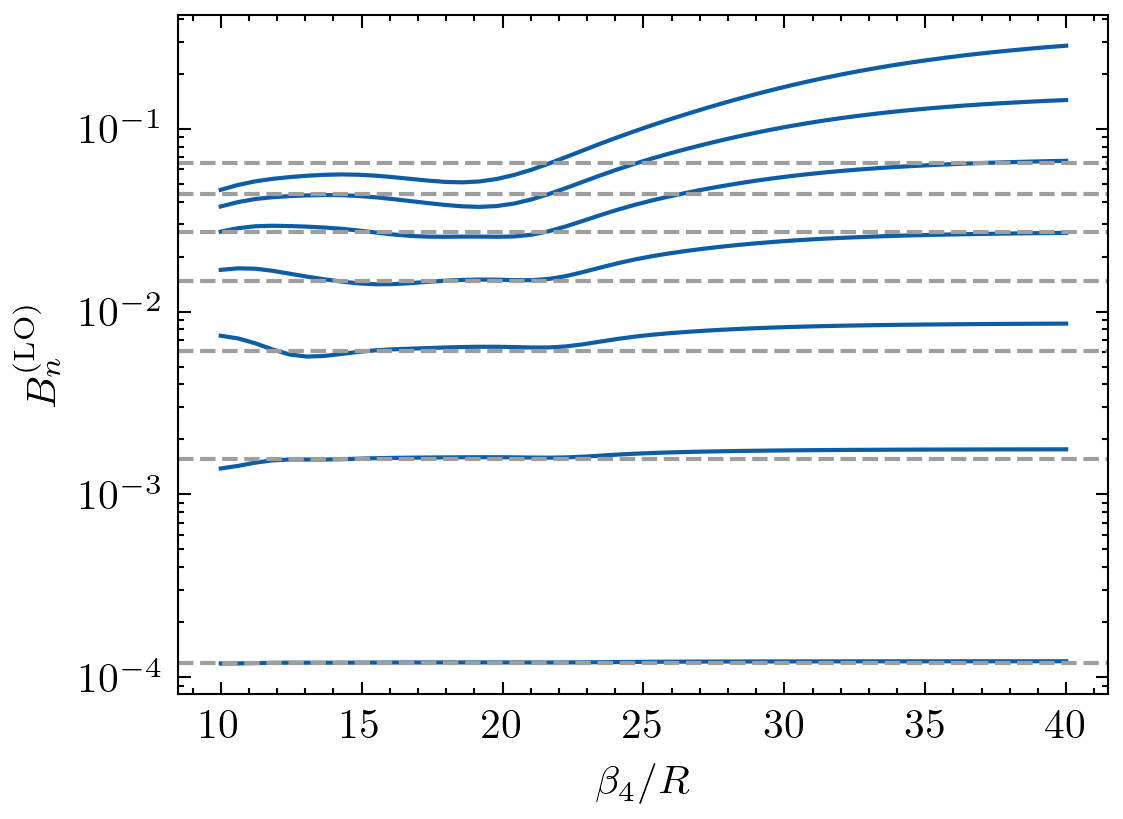

In [6]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

for i in range(7):
    ax.plot(const.BETA4/lo_spectra[:, 0], np.abs(lo_spectra[:, i+1]), color='C0')

for mm in mm_spectrum:
    ax.axhline(np.abs(mm), linestyle='--', color='C6')
ax.set_yscale('log')
ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$B_n^{({\rm LO})}$');

In [8]:
def convergence(r_c, c1, c2):
    return c1 * (1 + c2/r_c)

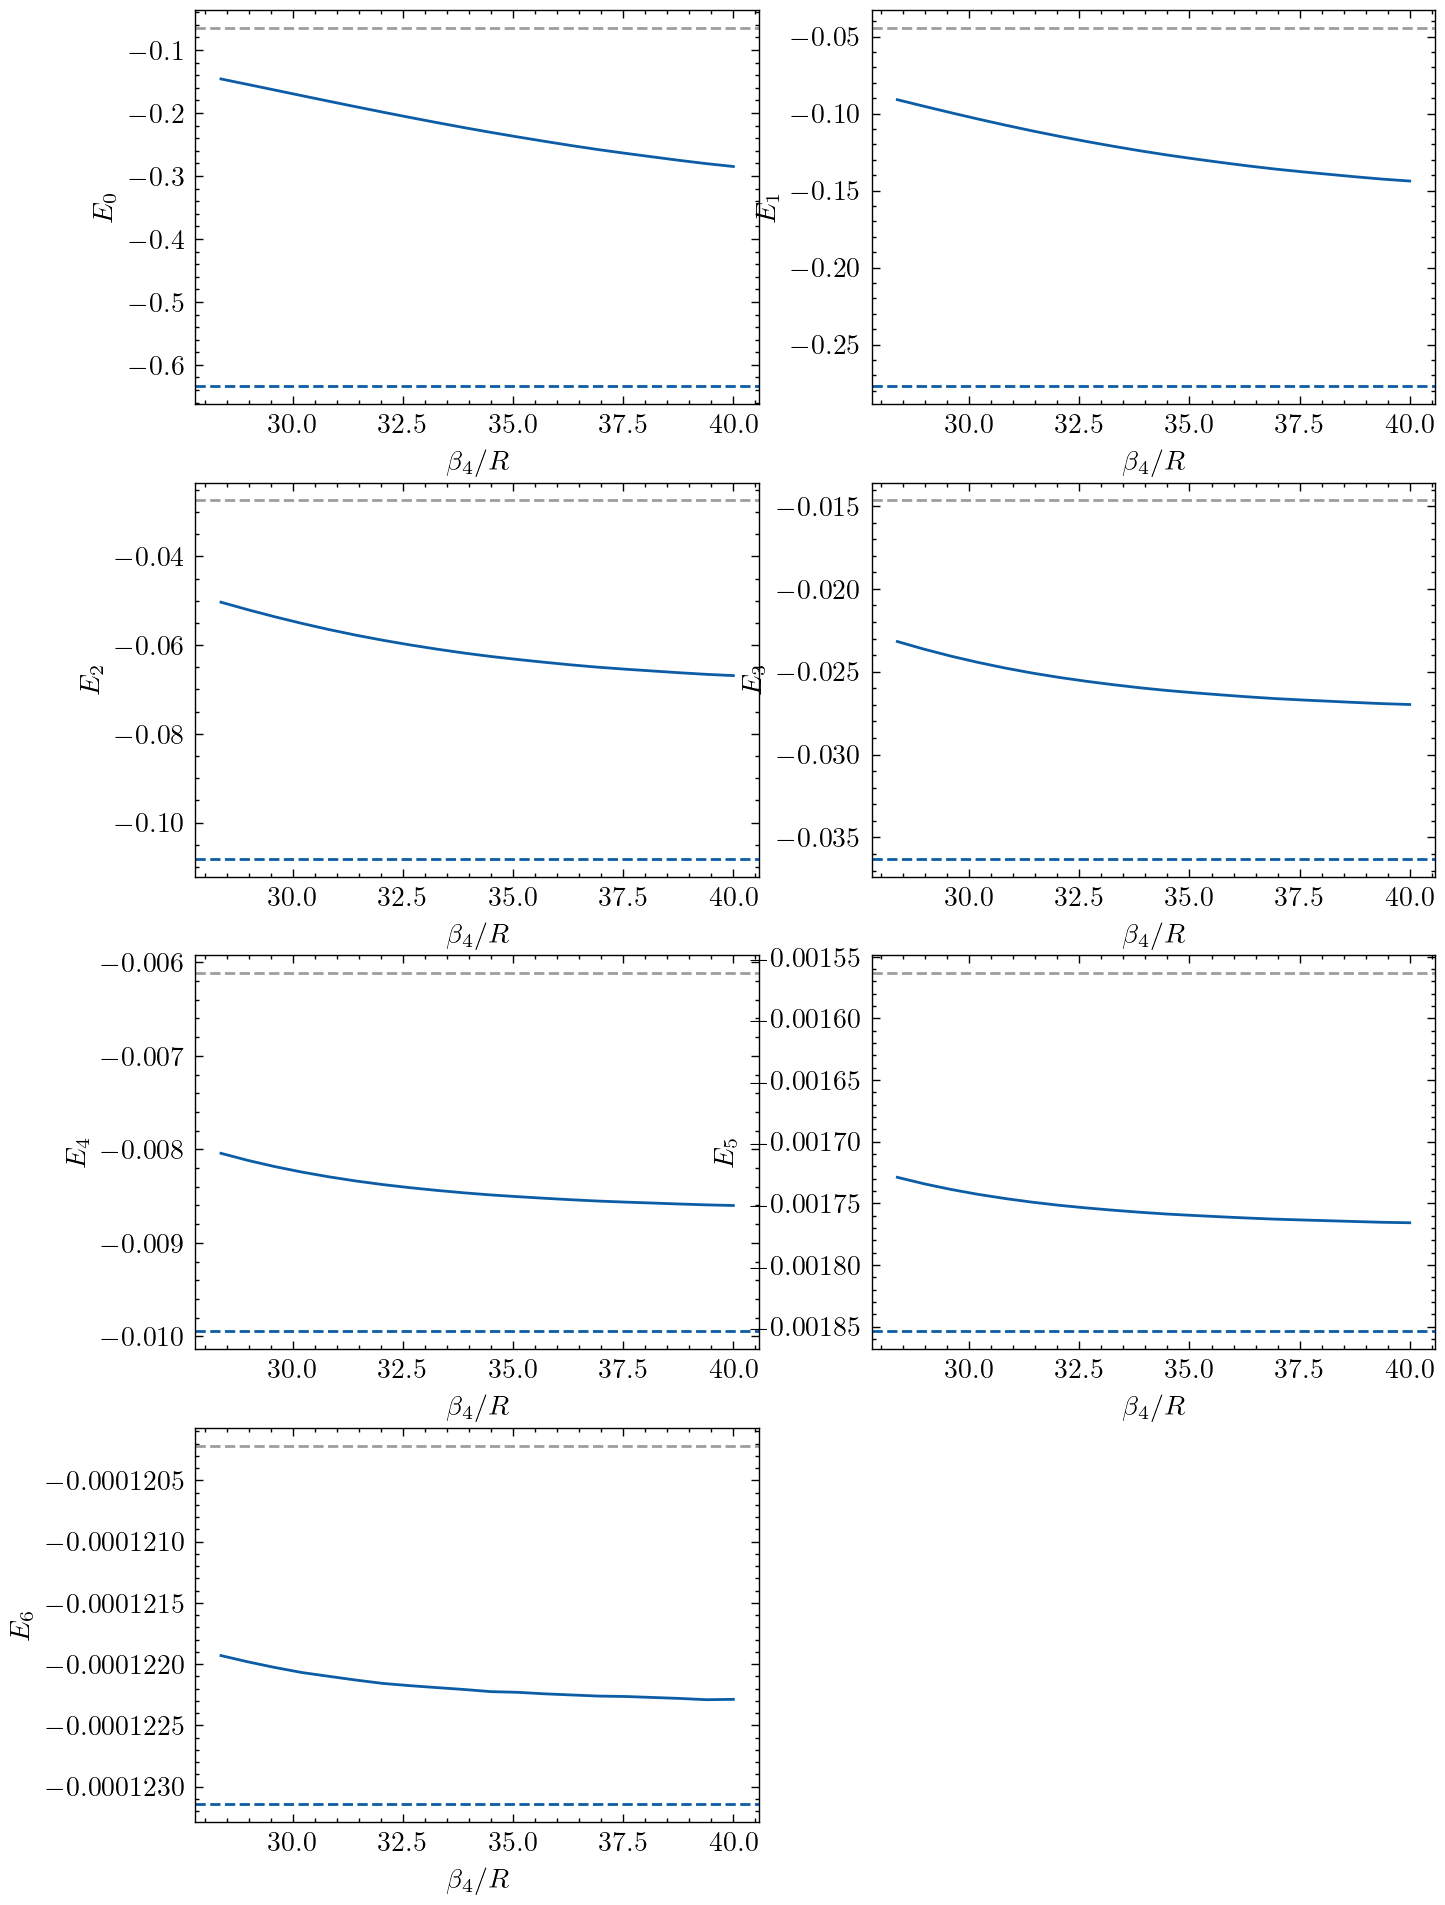

In [10]:
lo_asymp = np.zeros(7)

fig, ax = plt.subplots(4, 2, figsize=(2*4, 4*3), dpi=200)
fig.patch.set_facecolor('white')
fig.delaxes(ax[3, 1])

num_pts = 20

for k in range(7):
    i = k//2
    j = k%2
    
    # Plot the binding energies as a function of R.
    ax[i, j].plot(const.BETA4/lo_spectra[-num_pts:, 0], lo_spectra[-num_pts:, k+1], color='C0')
    # Plot the MM binding energies.
    ax[i, j].axhline(mm_spectrum[k], linestyle='--', color='C6')
    
    # Fit the B_n(R) dependence to the expected power series and plot the asymptotic value.
    par, cov = optimize.curve_fit(convergence, const.BETA4/lo_spectra[-num_pts:, 0], lo_spectra[-num_pts:, k+1])
    ax[i, j].axhline(par[0], color='C0', linestyle='--')
#     ax[i, j].plot(const.BETA4/lo_spectra[-num_pts:, 0], convergence(const.BETA4/lo_spectra[-num_pts:, 0], *par),
#                   color='C2', alpha=0.5)
    ax[i, j].set_xlabel(r'$\beta_4/R$')
    lo_asymp[k] = par[0]
    
    ax[i, j].set_ylabel(r'$E_{%d}$' % (k))

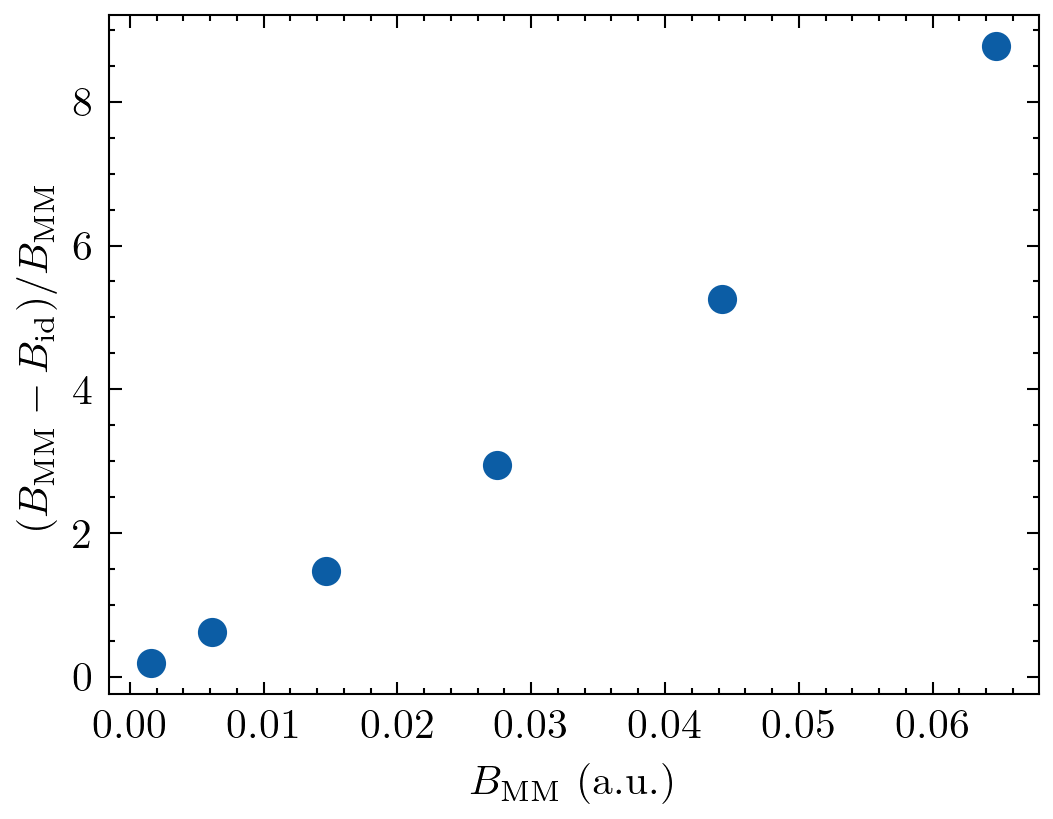

In [14]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
fig.patch.set_facecolor('white')

ax.scatter(np.abs(mm_spectrum[:-1]), np.abs((mm_spectrum[:-1] - lo_asymp[:-1])/mm_spectrum[:-1]))

# ax.set_xscale('log')
# ax.set_yscale('log')
ax.set_xlabel(r'$B_{\rm MM}$ (a.u.)')
ax.set_ylabel(r'$(B_{\rm MM} - B_{\rm id})/B_{\rm MM}$');

## Next-to-Leading Order

Next, we fix $B_5$ (in addition to $B_6$) in first-order perturbation theory.

$$
    E_n = E_n^{({\rm LO})} \left[1 + \langle\psi_n^{({\rm LO})} | V_{\rm NLO} | \psi_n^{({\rm LO})}\rangle\right]
$$

where

$$
    V_{\rm NLO}(r) = g_{\rm NLO} E e^{-(r/R)^4}
$$

### RG Flow

In [15]:
rg_flow_nlo = np.loadtxt('rgflow_local_nlo_a0_B6_fix.txt')

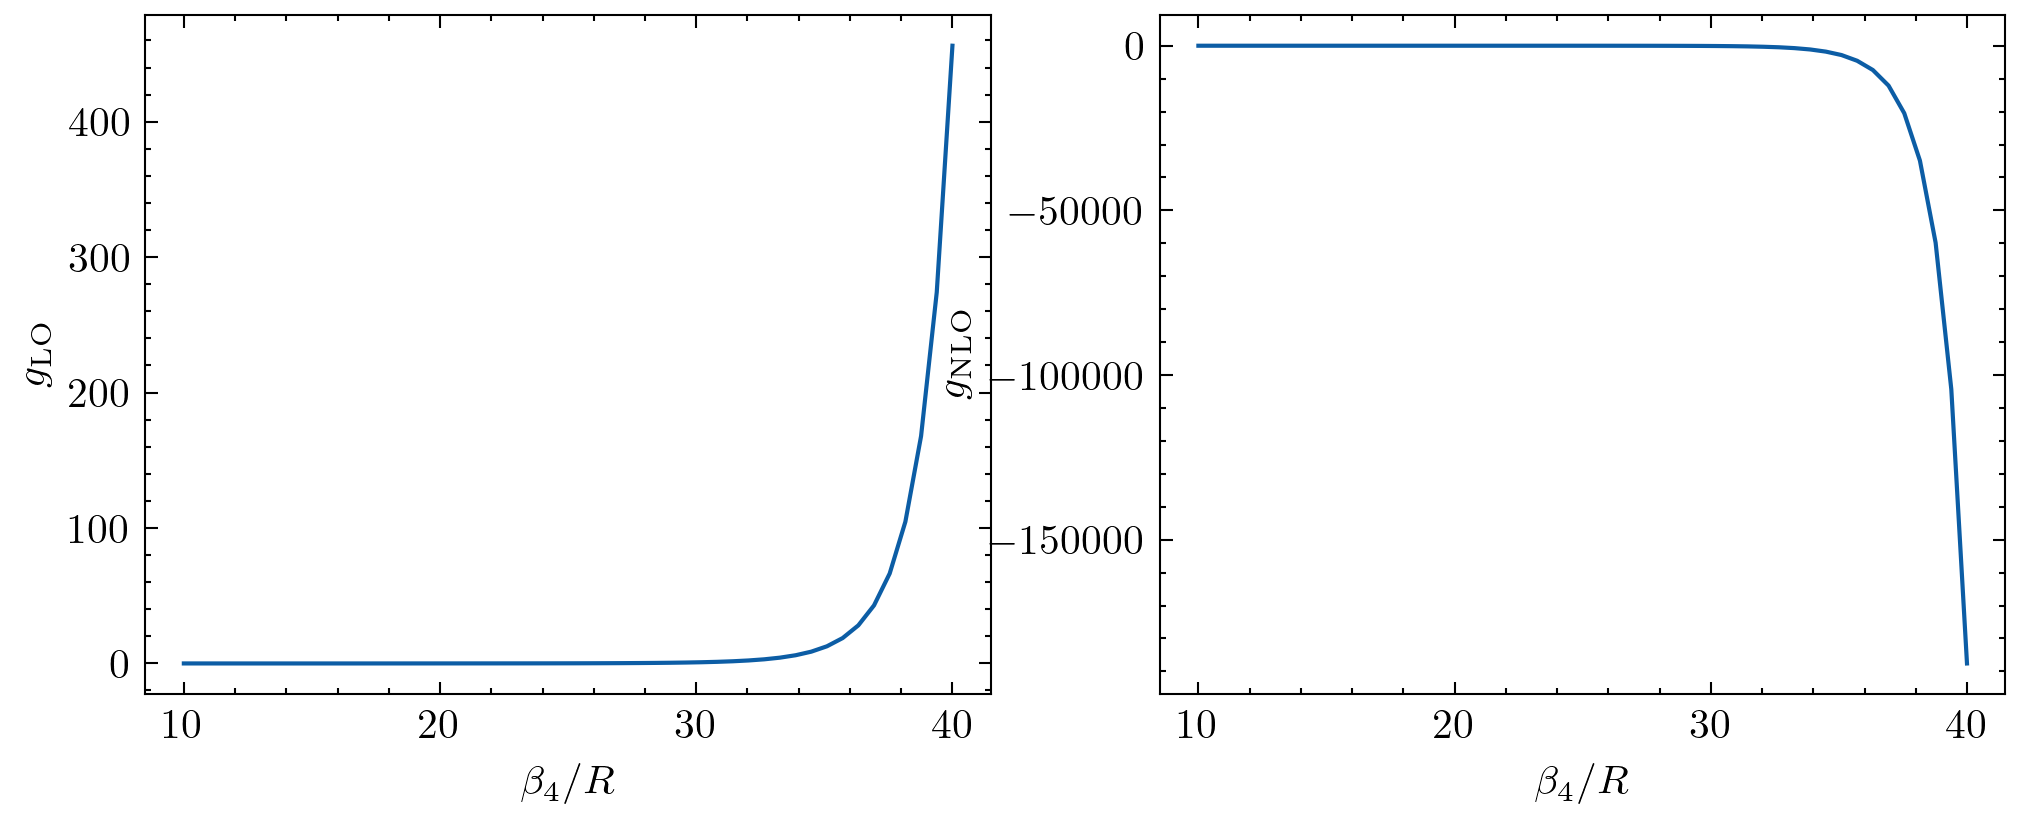

In [16]:
fig, ax = plt.subplots(1, 2, figsize=(2*gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

ax[0].plot(const.BETA4/rg_flow_nlo[:, 0], rg_flow_nlo[:, 1])
ax[1].plot(const.BETA4/rg_flow_nlo[:, 0], rg_flow_nlo[:, 2])

ax[0].set_xlabel(r'$\beta_4/R$')
ax[0].set_ylabel(r'$g_{\rm LO}$')

ax[1].set_xlabel(r'$\beta_4/R$')
ax[1].set_ylabel(r'$g_{\rm NLO}$');

In [21]:
nlo_spectra = np.loadtxt('spectra_local_nlo_a0_B6_fix.txt')

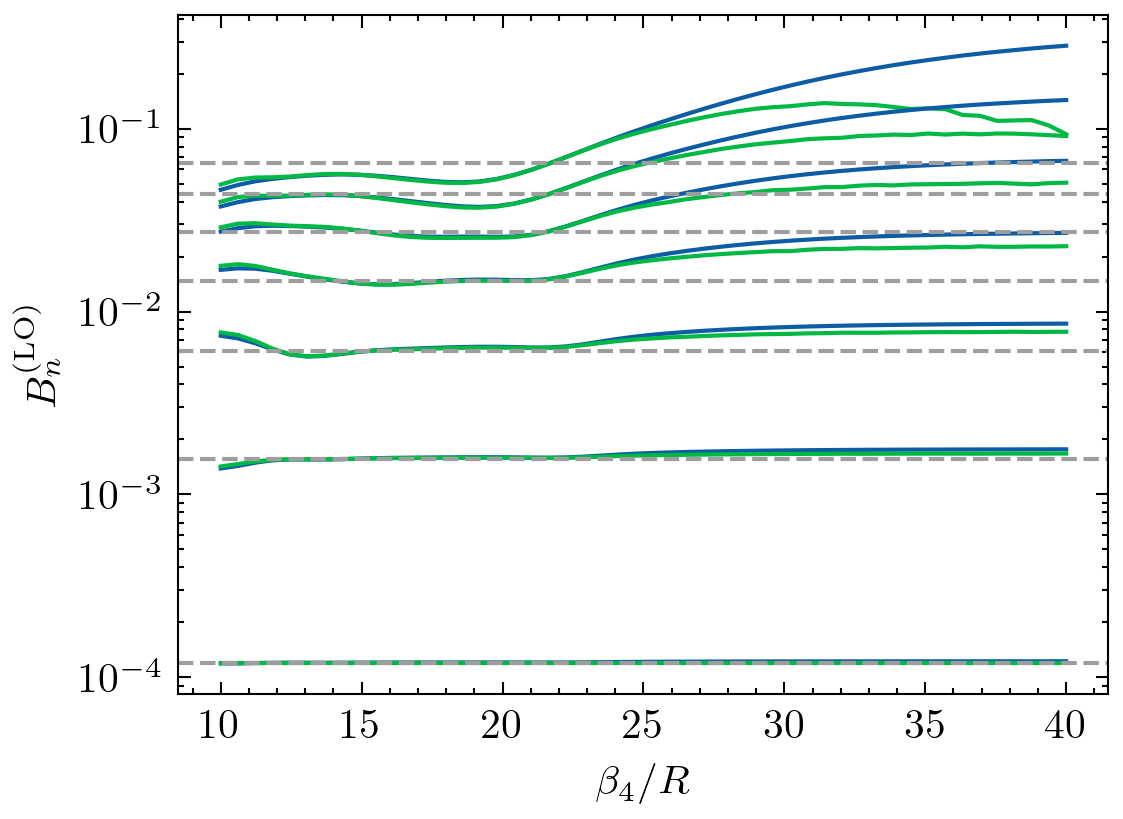

In [22]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

for i in range(7):
    ax.plot(const.BETA4/lo_spectra[:, 0], np.abs(lo_spectra[:, i+1]), color='C0')
    ax.plot(const.BETA4/lo_spectra[:, 0], np.abs(nlo_spectra[:, i+1]), color='C1')

for mm in mm_spectrum:
    ax.axhline(np.abs(mm), linestyle='--', color='C6')
ax.set_yscale('log')
ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$B_n^{({\rm LO})}$');

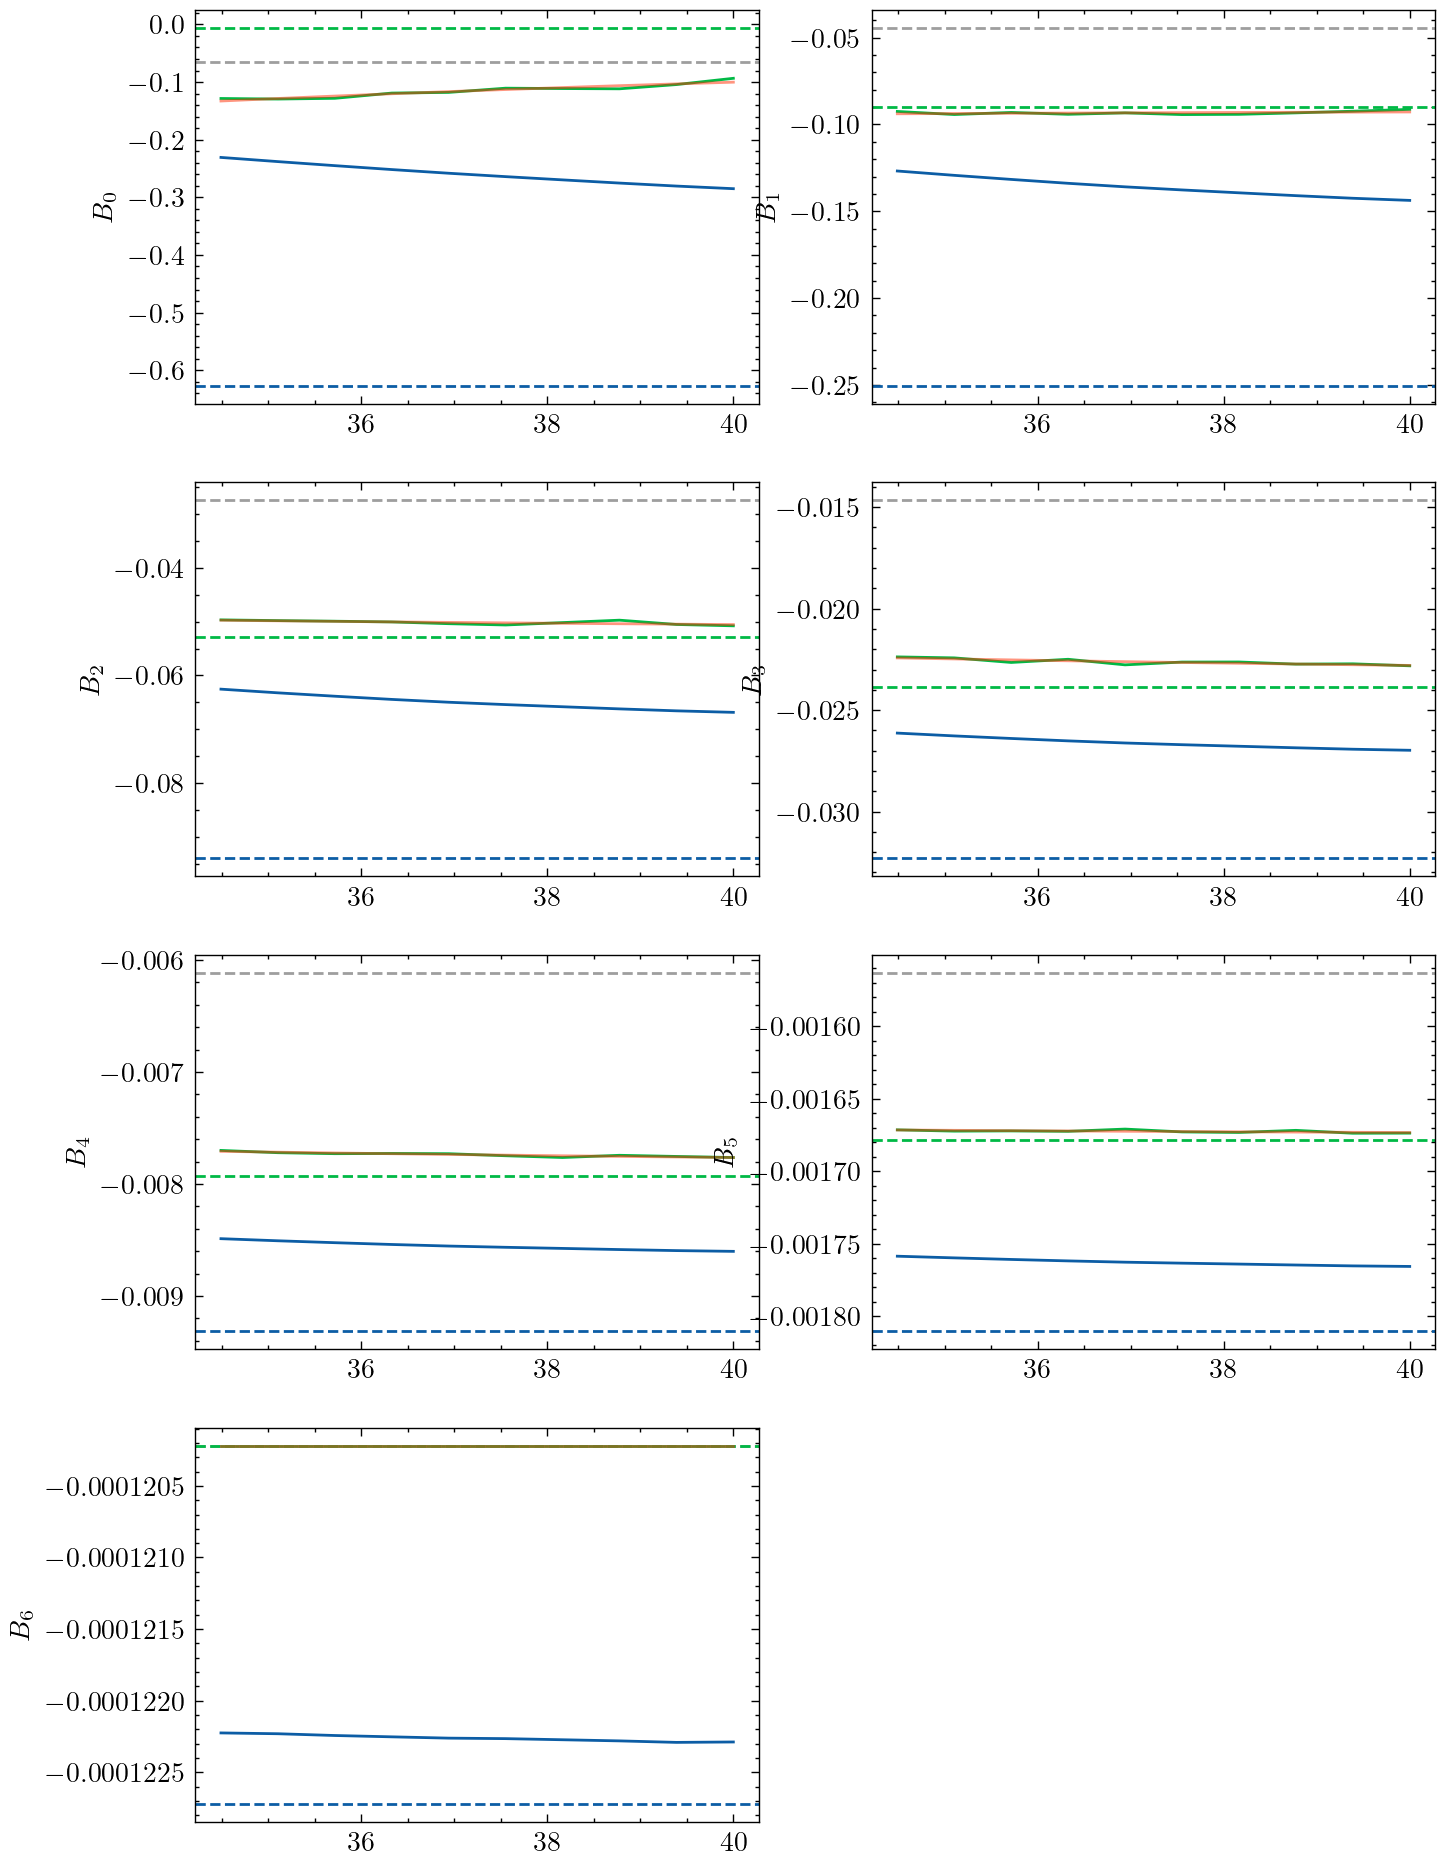

In [23]:
def convergence2(r_c, c1, c2):
    return c1 * (1 + c2*(1/r_c)**2)

nlo_asymp = np.zeros(7)

fig, ax = plt.subplots(4, 2, figsize=(2*4, 4*3), dpi=200)
fig.patch.set_facecolor('white')
fig.delaxes(ax[3, 1])

num_pts = 10

for k in range(7):
    i = k//2
    j = k%2
    ax[i, j].plot(const.BETA4/lo_spectra[-num_pts:, 0], lo_spectra[-num_pts:, k+1], color='C0')
    ax[i, j].plot(const.BETA4/nlo_spectra[-num_pts:, 0], nlo_spectra[-num_pts:, k+1], color='C1')
    ax[i, j].axhline(mm_spectrum[k], linestyle='--', color='C6')
    
    par, cov = optimize.curve_fit(convergence, const.BETA4/lo_spectra[-num_pts:, 0], lo_spectra[-num_pts:, k+1])
    ax[i, j].axhline(par[0], color='C0', linestyle='--')
#     ax[i, j].plot(const.BETA4/lo_spectra[-num_pts:, 0], convergence(const.BETA4/lo_spectra[-num_pts:, 0], *par),
#                   color='C2', alpha=0.5)
    lo_asymp[k] = par[0]
    
    ax[i, j].set_ylabel(r'$B_{%d}$' % (k))
    
    par, cov = optimize.curve_fit(convergence2, const.BETA4/nlo_spectra[-num_pts:, 0], nlo_spectra[-num_pts:, k+1])
    ax[i, j].axhline(par[0], color='C1', linestyle='--')
    ax[i, j].plot(const.BETA4/nlo_spectra[-num_pts:, 0], convergence2(const.BETA4/nlo_spectra[-num_pts:, 0], *par),
                  color='C3', alpha=0.5)
    nlo_asymp[k] = par[0]

/var/folders/_z/4zb077j96tz1_kb2vklbxydr0000gn/T/ipykernel_30708/2262354857.py:15: UserWarning: Attempted to set non-positive left xlim on a log-scaled axis.
Invalid limit will be ignored.
  ax.set_xlim(xlim)


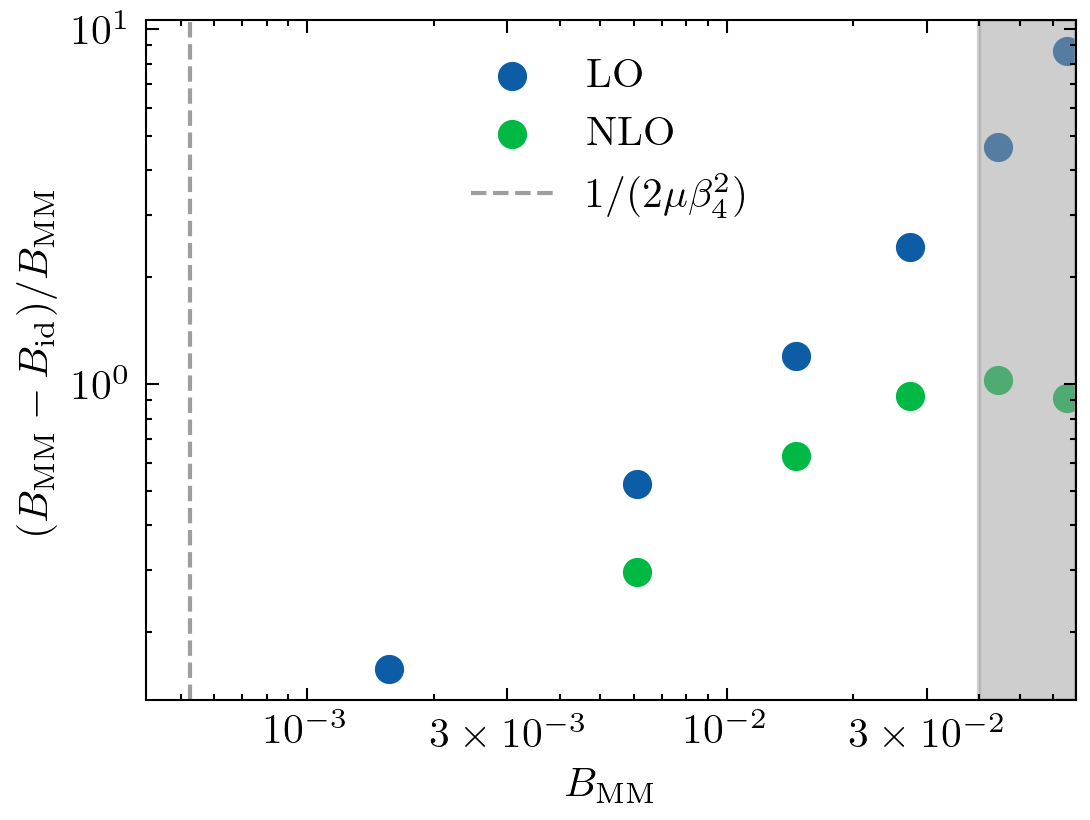

In [76]:
fig, ax = plt.subplots(figsize=(4, 3), dpi=300)
fig.patch.set_facecolor('white')

ax.scatter(np.abs(mm_spectrum[:-1]), np.abs((mm_spectrum[:-1] - lo_asymp[:-1])/mm_spectrum[:-1]), label='LO')
ax.scatter(np.abs(mm_spectrum[:-2]), np.abs((mm_spectrum[:-2] - nlo_asymp[:-2])/mm_spectrum[:-2]), label='NLO')

ax.axvline(1/(2*const.MU*2**2), color='C6', linestyle='--', label=r'$1/(2\mu\beta_4^2)$')

ax.legend()
xlim = ax.get_xlim()
ax.axvspan(4e-2, xlim[1], color='C6', alpha=0.5)
ax.set_xscale('log')
ax.set_xticks([1e-3, 3e-3, 1e-2, 3e-2])
ax.set_xticklabels([r'$10^{-3}$', r'$3\times 10^{-3}$', r'$10^{-2}$', r'$3\times 10^{-2}$'])
ax.set_xlim(xlim)
ax.set_xlabel(r'$B_{\rm MM}$')

ax.set_yscale('log')
ax.set_ylabel(r'$(B_{\rm MM} - B_{\rm id})/B_{\rm MM}$');

## Scattering

Now, we'll look at $k\cot\delta$. What do you expect $k\cot\delta$ to look like for different values of $R$?

In [26]:
kcds_lo = np.loadtxt('kcd_lo.txt')[:, 1:]
kcds_nlo = np.loadtxt('kcd_nlo.txt')[:, 1:]
ks = np.loadtxt('momenta.txt')
kcds_mm = np.loadtxt('kcd_mm.txt')

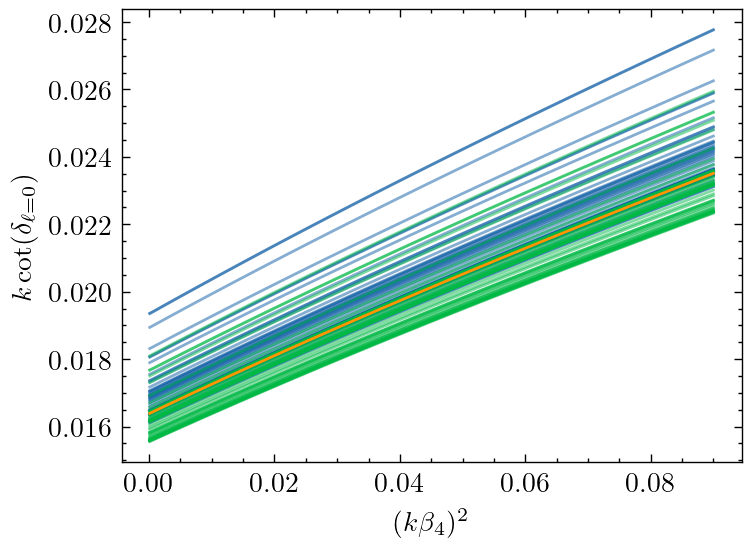

In [27]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for kcd in kcds_lo:
    ax.plot((ks*const.BETA4)**2, kcd, color='C0', alpha=0.5)

for kcd in kcds_nlo:
    ax.plot((ks*const.BETA4)**2, kcd, color='C1', alpha=0.5)
    
ax.plot((ks*const.BETA4)**2, kcds_mm, color='C2')

ax.set_xlabel(r'$(k\beta_4)^2$')
ax.set_ylabel(r'$k\cot(\delta_{\ell=0})$');

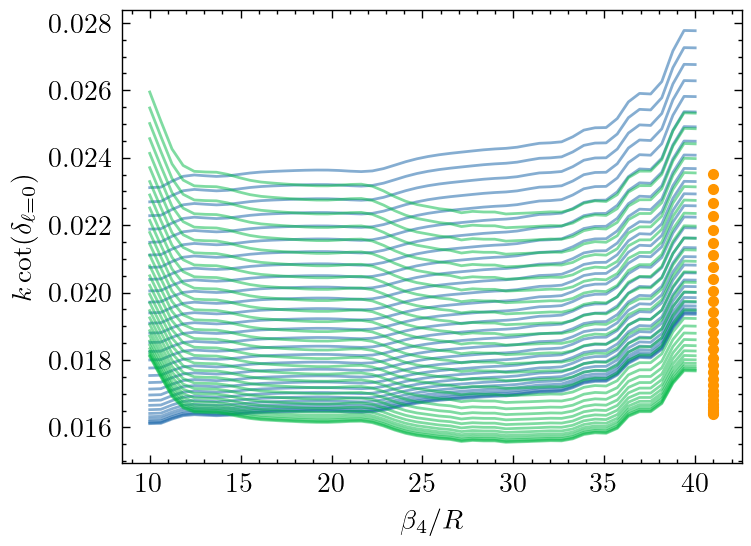

In [28]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for kcd in kcds_lo.T:
    ax.plot(const.BETA4/rg_flow_lo[:, 0], kcd, color='C0', alpha=0.5)

for kcd in kcds_nlo.T:
    ax.plot(const.BETA4/rg_flow_lo[:, 0], kcd, color='C1', alpha=0.5)

ax.scatter(np.ones(30)*41, kcds_mm, color='C2', marker='.')
ax.set_xlabel(r'$\beta_4/R$')
ax.set_ylabel(r'$k\cot(\delta_{\ell=0})$');

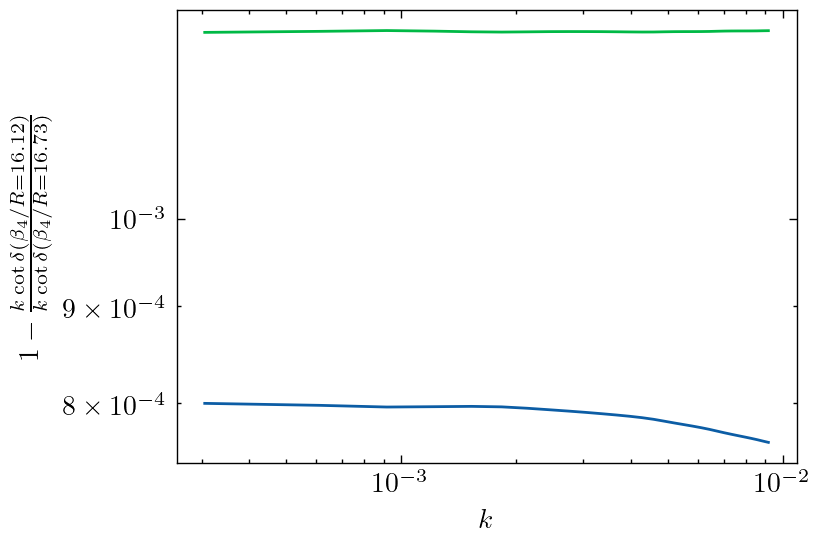

In [29]:
i = 10

fig, ax = plt.subplots(figsize=(gr*h, h), dpi=200)
fig.patch.set_facecolor('white')

for j in range(11, 12):
    ax.plot(ks, np.abs(1 - kcds_lo[j, :]/kcds_lo[i, :]), color='C0')
    ax.plot(ks, np.abs(1 - kcds_nlo[j, :]/kcds_nlo[i, :]), color='C1')

ax.set_xscale('log')
ax.set_yscale('log')

ax.set_xlabel(r'$k$')
ax.set_ylabel(r'$1 - \frac{k\cot\delta(\beta_4/R=%.2f)}{k\cot\delta(\beta_4/R=%.2f)}$' %
              (const.BETA4/rg_flow_lo[i, 0], const.BETA4/rg_flow_nlo[j, 0]));

In [34]:
spectra_lo_a0 = np.loadtxt('spectra_local_lo_a0_fix.txt')
spectra_lo_a0.shape

(50, 8)

In [35]:
spectra_nlo_a0 = np.loadtxt('spectra_local_nlo_a0_B6_fix.txt')
spectra_nlo_a0.shape

(50, 8)

In [36]:
mm_spectrum

array([-0.06476092, -0.04422753, -0.02740712, -0.01466185, -0.00611631,
       -0.00156327, -0.00012022])

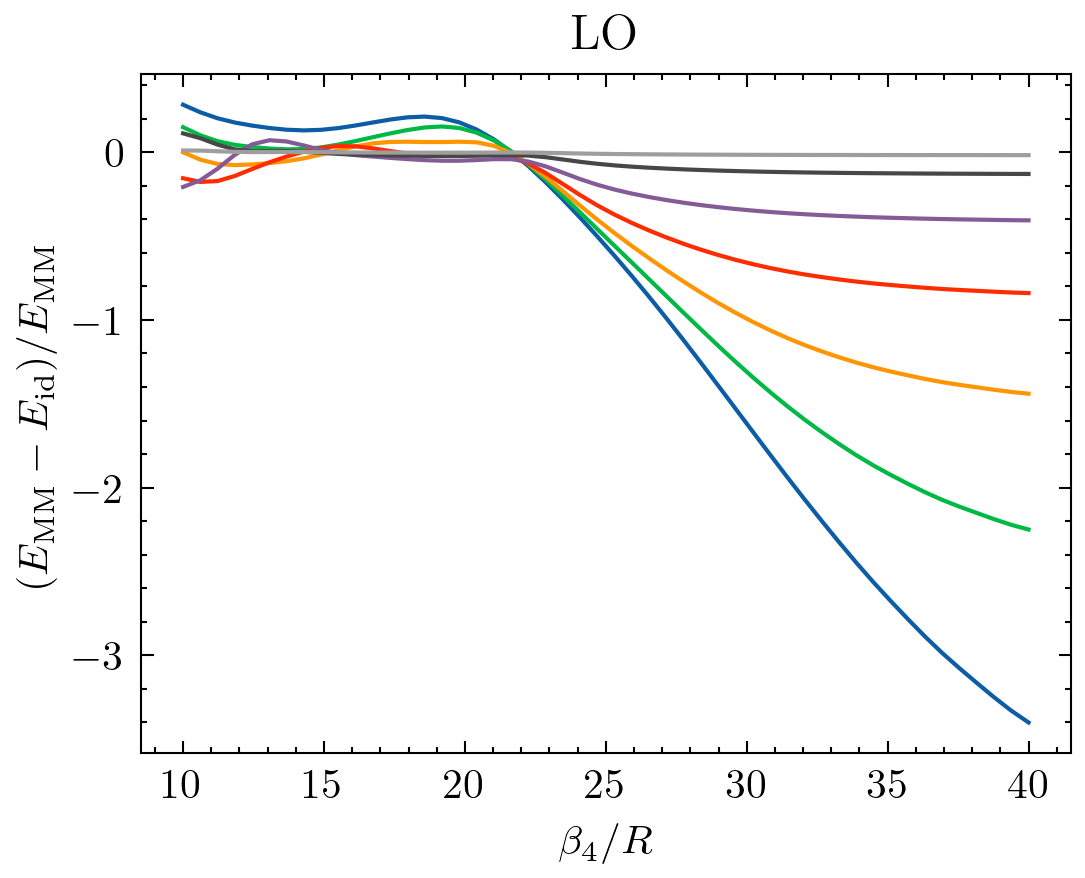

In [41]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

for i in range(1, 8):
    ax.plot(const.BETA4/spectra_lo_a0[:, 0], (mm_spectrum[i-1] - spectra_lo_a0[:, i])/mm_spectrum[i-1],
            label='$B_{n=%d}$' % (i))

ax.set_xlabel(r'$\beta_4/R$')
ax.set_title(r'LO')
ax.set_ylabel(r'$(E_{\rm MM}-E_{\rm id})/E_{\rm MM}$');

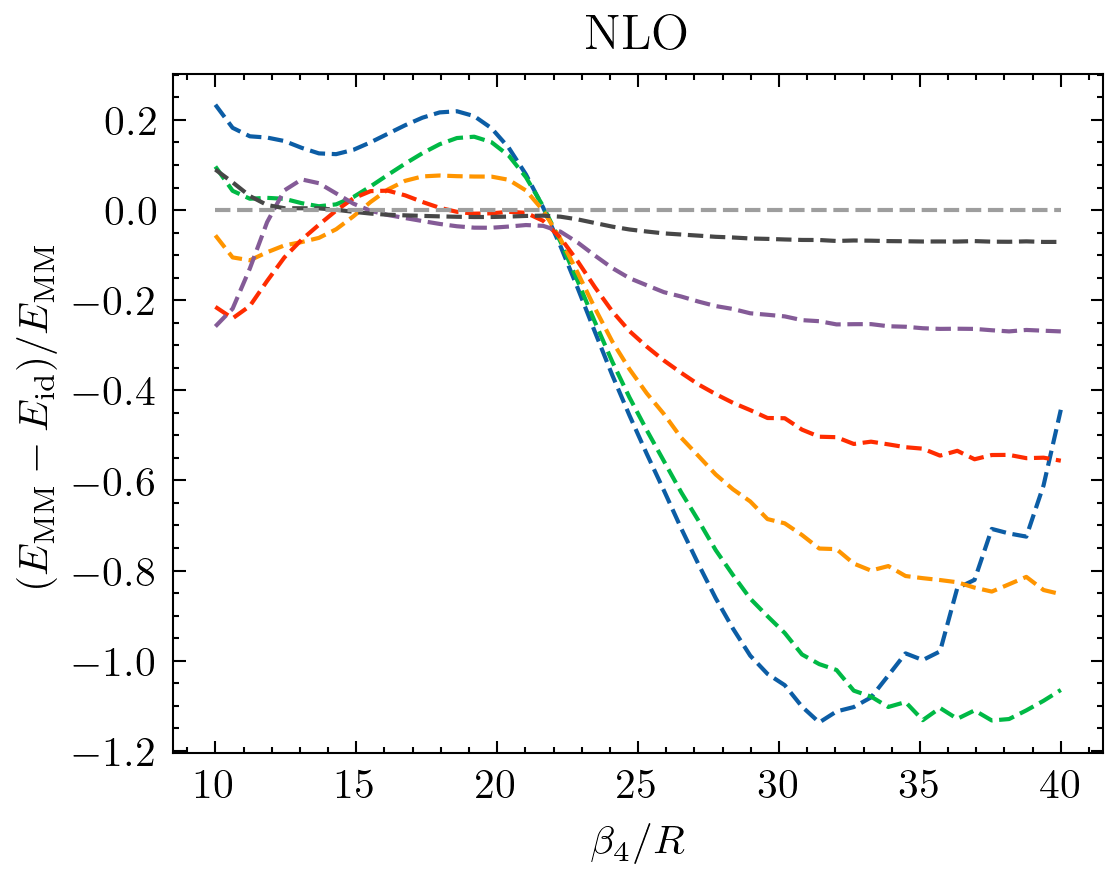

In [42]:
fig, ax = plt.subplots(figsize=(gr*h, h), dpi=300)
fig.patch.set_facecolor('white')

for i in range(1, 8):
    ax.plot(const.BETA4/spectra_nlo_a0[:, 0], (mm_spectrum[i-1] - spectra_nlo_a0[:, i])/mm_spectrum[i-1],
            label='$B_{n=%d}$' % (i), linestyle='--')

ax.set_xlabel(r'$\beta_4/R$')
ax.set_title(r'NLO')
ax.set_ylabel(r'$(E_{\rm MM}-E_{\rm id})/E_{\rm MM}$');